#Assignment M6.2 (Python)

# Problem P1

Given the data:
\begin{align*}
& 0.90 \qquad 1.42 \qquad 1.30 \qquad 1.55 \qquad 1.63 \qquad 1.32 \qquad 1.35 \qquad 1.47 \qquad 1.95 \qquad 1.66 \\
& 1.96 \qquad 1.47 \qquad 1.92 \qquad 1.35 \qquad  1.05 \qquad  1.85 \qquad 1.74 \qquad 1.65 \qquad 1.78 \qquad 1.71 \\
& 2.29 \qquad 1.82 \qquad 2.06 \qquad 2.14 \qquad 1.27
\end{align*}

1. Use Python to determine the mean, median, mode, range, standard deviation, variance, and coefficient of variation.
2. *Construct* a histogram from the data using python.


mean = 1.6244000000000003
median = 1.65
mode = 1.35
range = 1.3900000000000001
stdev = 0.33938768392503577
variance = 0.115184
coeff of variation = 0.2089311031304086


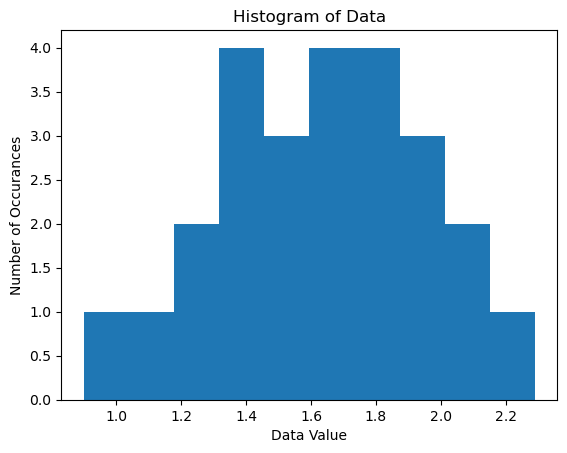

In [2]:
# P1 Answer
import statistics as s
import numpy as np
import matplotlib.pyplot as plt

A = np.array([0.90,1.42,1.30,1.55,1.63,1.32,1.35,1.47,1.95,1.66,1.96,1.47,1.92,1.35,1.05,1.85,1.74,1.65,1.78,1.71,2.29,1.82,2.06,2.14,1.27])

print(f"mean = {np.mean(A)}")
print(f"median = {np.median(A)}")
print(f"mode = {s.mode(A)}")
print(f"range = {max(A)-min(A)}")
print(f"stdev = {s.stdev(A)}")
print(f"variance = {s.variance(A)}")
print(f"coeff of variation = {s.stdev(A)/s.mean(A)}")

plt.hist(A)
plt.title("Histogram of Data")
plt.xlabel("Data Value")
plt.ylabel("Number of Occurances")
plt.show()

# Problem P2

A transportation engineering study was conducted to determine the proper design of bike lanes. Data were gathered on bike-lane widths and average distance between bikes and passing cars. The data from $9$ streets are
\begin{align*}
&\rm{Distance\ , m}  &&\qquad 2.4 \qquad 1.5 \qquad 2.4 \qquad 1.8 \qquad 1.8 \qquad 2.9 \qquad 1.2 \qquad 3  & 1.2 \\
&\rm{Lane\ width\ , m} &&\qquad 2.9 \qquad 2.1 \qquad 2.3 \qquad 2.1 \qquad 1.8 \qquad 2.7 \qquad 1.5 \qquad 2.9  & 1.5
\end{align*}


1. Fit a straight line using `linregress` to the data. What is the equation of the line for lane width versus distance. Check the coefficient of determination $R^{2}$ to decide if the line represents the data well. Also, plot the data along with the regression line and check if the fit is reasonable.
2. Compare your regression line with that obtained from `polyfit`.
2. If the minimum safe average distance between bikes and passing cars is considered to be $1.8$ m, determine the corresponding lane width.



R^2 = 0.8374033313503869


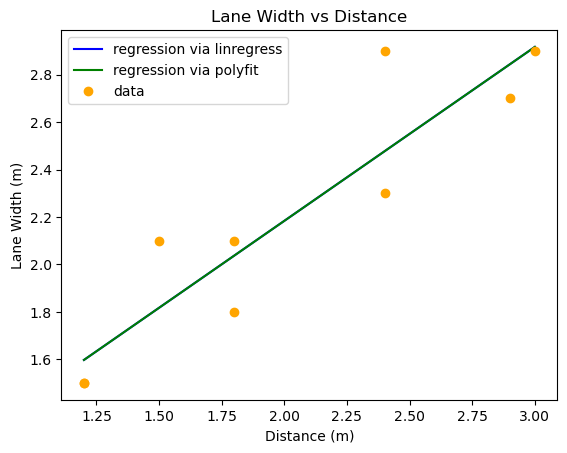

lane_width(1.8m) = 2.037001784651993m


In [3]:
# P2 Answer
from scipy.stats import linregress

distance = np.array([2.4,1.5,2.4,1.8,1.8,2.9,1.2,3,1.2])
width = np.array([2.9,2.1,2.3,2.1,1.8,2.7,1.5,2.9,1.5])
r_results = linregress(distance, width)
x = np.linspace(min(distance), max(distance), 100)
y = lambda x: r_results.intercept + x * r_results.slope
print(f"R^2 = {r_results.rvalue**2}")

np_results = np.polyfit(distance, width, 1)
y_np = lambda x: np_results[1] + x * np_results[0]


plt.plot(x, y(x), 'b-', label="regression via linregress")
plt.plot(x, y_np(x), 'g-', label='regression via polyfit')
plt.plot(distance, width, 'o', color='orange', label='data')
plt.title("Lane Width vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Lane Width (m)")
plt.legend()
plt.show()

print(f"lane_width(1.8m) = {y(1.8)}m")



# Problem P3

Andrade's equation has been proposed as a model of the effect of temperature on viscosity:
\begin{equation}
\mu=D e^{B/T}
\end{equation}
where $\mu$ $[10^{-3}\,\rm{N.s/m^{2}]}$ is dynamic viscosity of water, $T$ [K] is  the absolute temperature, and $D$ and $B$ are parameters. Fit this model to the following data for water:
\begin{align*}
&T\,\rm{[K]}&&273 &&278 &&283 &&293 &&303 &&\ \ \ \ 313 \\
&\mu\,[10^{-3}\rm{N.s/m^{2}]} &&1.787 &&1.519 &&1.307 &&1.002 &&0.7975 &&\ \ \ \ 0.6529
\end{align*}
Show the accuracy of the fit by plotting the regression line along with the data. Report the $R^2$ value and decide whether the fit is good.

D=0.0005465667774337241, B=2206.0103075622196
r^2 = 0.998166090613174


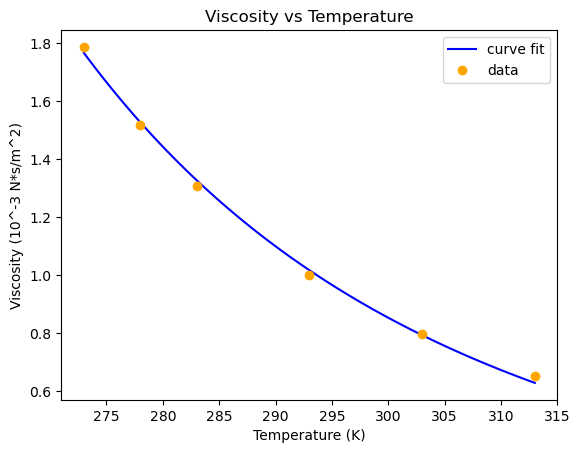

In [4]:
# P3 Answer
from scipy.optimize import curve_fit

def nonlinear_function(T, D, B):
    return D * np.exp(B/T)

T_data = np.array([273,278,283,293,303,313])
viscosity_data = np.array([1.787,1.519,1.307,1.002,0.7975,0.6529])

params, covariance_matrix = curve_fit(nonlinear_function, T_data, viscosity_data)
print(f"D={params[0]}, B={params[1]}")
v = lambda T: params[0] * np.exp(params[1]/T)
T = np.linspace(min(T_data), max(T_data), 100)

v_fit = v(T_data)
ss_tot = np.sum((viscosity_data - np.mean(viscosity_data)) ** 2)
ss_res = np.sum((viscosity_data - v_fit) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"r^2 = {r_squared}")

plt.plot(T, v(T), 'b-', label='curve fit')
plt.plot(T_data, viscosity_data, 'o', color='orange', label='data')
plt.legend()
plt.title("Viscosity vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Viscosity (10^-3 N*s/m^2)")
plt.show()

# Problem P4
Use the portion of the given steam table for superheated water at $200$ MPa to find the corresponding entropy $s$ for a specific volume $v$ of $0.118$ $\rm{m^{3}/kg}$ using
1. linear interpolation
2. interpolation using python `polyfit` function

\begin{align*}
&v\, [\rm{m^{3}/kg}] && 0.10377 &&\qquad 0.11144 &&\qquad 0.12547\\
&s\, [kJ/(kg.K)] && 6.4147 &&\qquad 6.5453 &&\qquad 6.7664
\end{align*}


s(0.118 m^3/kg) = 6.647182958980115
s(0.118 m^3/kg) = 6.803821765305839


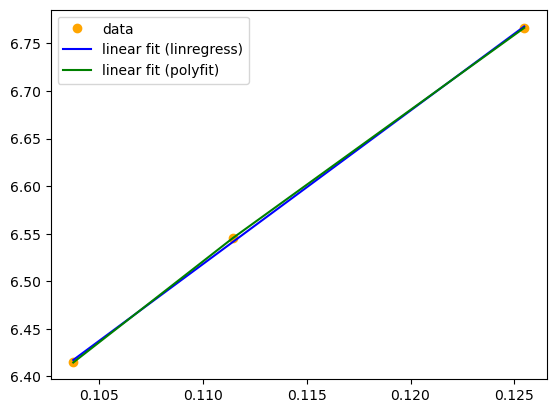

In [5]:
# P4 Answer
v_data = np.array([0.10377, 0.11144, 0.12547])
s_data = np.array([6.4147, 6.5453, 6.7664])

r_results = linregress(v_data, s_data)
s_fit = lambda v: r_results.intercept + v * r_results.slope

np_results = np.polyfit(v_data, s_data, 2)

s_np_fit = lambda v: np_results[0] * v**2 + np_results[1] * v + np_results[2]

plt.plot(v_data, s_data, 'o', color='orange', label='data')
plt.plot(v_data, s_fit(v_data), 'b-', label='linear fit (linregress)')
plt.plot(v_data, s_np_fit(v_data), 'g-', label='linear fit (polyfit)')
plt.legend()

print(f"s(0.118 m^3/kg) = {s_fit(0.118)}")
print(f"s(0.118 m^3/kg) = {s_np_fit(0.128)}")

# Problem P5

Consider this function
\begin{equation}
f(x)=\frac{1}{(x-0.3)^{2}+0.01}+\frac{1}{(x-0.9)^{2}+0.04}-6
\end{equation}
Generate 11 data points using this function in the interval between $0$ and $1$ and then fit them with a cubic spline function. It appears that the `natural` end condition provides a better behavior of the spline curve than `not-a-knot` near the end points. Create a plot comparing the fit with the exact function. Calculate the interpolated value of the function at $x=0.05$. Compare this value with that from the exact function and verify that the `natural` end condition provides a better prediction of the function near the end point than  the `not-a-knot` condition.

f(0.05) = 9.104578858111928
fit(0.05) = 9.594244088036053


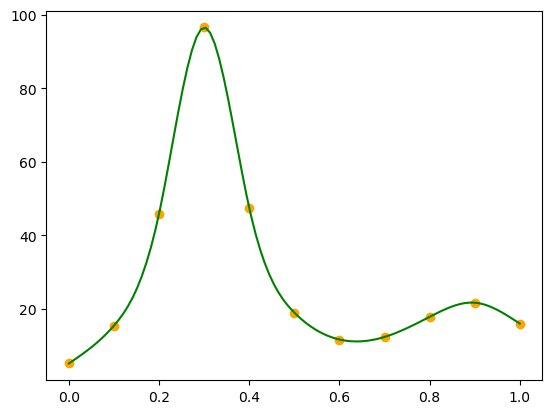

In [6]:
# P5 Answer
from scipy.interpolate import CubicSpline
f = lambda x: 1.0/((x-0.3)**2 + 0.01) + 1.0/((x-0.9)**2 + 0.04) - 6

x_big_data = np.linspace(0,1,100)
x_data = np.linspace(0, 1, 11)
f_data = f(x_data)
f_fit = CubicSpline(x_data, f_data, bc_type='natural')


plt.plot(x_data, f_data, 'o', color='orange', label='data')
# plt.plot(x_data, f(x_data), 'b-', label="f(x)")
plt.plot(x_big_data, f_fit(x_big_data), 'g-', label="cubic fit")

print(f'f(0.05) = {f(0.05)}')
print(f"fit(0.05) = {f_fit(0.05)}")

